# Agent-based Model

Source: https://mesa.readthedocs.io/en/stable/tutorials/intro_tutorial.html#introductory-tutorial

In [1]:
# Libraries

# Agent-based modeling
import mesa

# Data visualization
import seaborn as sns

# Data manipulation
import numpy as np
import pandas as pd

In [5]:
# Create the agent

class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, unique_id, model):
        # Pass the parameters to the parent class.
        super().__init__(unique_id, model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

    def step(self):
        # Verify agent has some wealth
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.schedule.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1

In [3]:
# Create the model
class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N):
        self.num_agents = N
        # Create scheduler and assign it to the model
        self.schedule = mesa.time.RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            # Add the agent to the scheduler
            self.schedule.add(a)

    def step(self):
        """Advance the model by one step."""

        # The model's step will go here for now this will call the step method of each agent and print the agent's unique_id
        self.schedule.step()

In [7]:
model = MoneyModel(10)
for i in range(10):
    model.step()

/var/folders/2p/zsvmljhd45n72ws61v37xglh0000gn/T/ipykernel_36305/3264512319.py:8: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


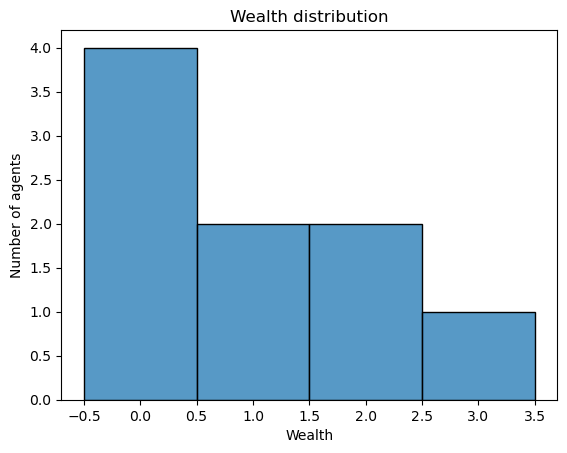

In [8]:
agent_wealth = [a.wealth for a in model.schedule.agents]
# Create a histogram with seaborn
g = sns.histplot(agent_wealth, discrete=True)
g.set(
    title="Wealth distribution", xlabel="Wealth", ylabel="Number of agents"
);  # The semicolon is just to avoid printing the object representation

/var/folders/2p/zsvmljhd45n72ws61v37xglh0000gn/T/ipykernel_36305/3264512319.py:8: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


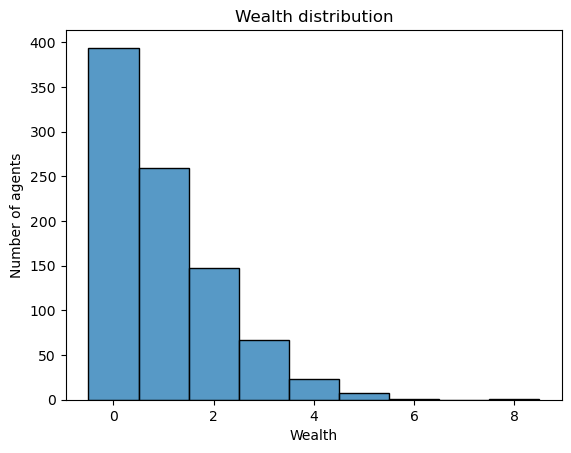

In [9]:
all_wealth = []
# This runs the model 100 times, each model executing 10 steps.
for j in range(100):
    # Run the model
    model = MoneyModel(10)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

# Use seaborn
g = sns.histplot(all_wealth, discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="Number of agents");

In [ ]:
# Adding a spatial element to the model
